In [1]:
import json
import warnings
import numpy as np
import pandas as pd
import pingouin as pg
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'
warnings.filterwarnings('ignore')

# Load cluster colors for anterior, body, and posterior.
with open('cluster_colors.json', 'r') as f:
    cluster_colors = {int(k): tuple(v) for k, v in json.load(f).items()}

# Load data.
df = pd.read_csv('supplementary_data.csv')
display(df,df.columns)

,ant_L_visual_a_FC,ant_L_visual_b_FC,ant_L_somatomotor_a_FC,ant_L_somatomotor_b_FC,ant_L_dorsal_attention_a_FC,ant_L_dorsal_attention_b_FC,ant_L_ventral_attention_FC,ant_L_salience_FC,ant_L_limbic_a_FC,ant_L_limbic_b_FC,...,post_sharpness,post_segregation,post_RSC_OVR,post_POS2_OVR,post_7Pm_OVR,post_control_c_OVR,post_control_c,post_7Pm,post_POS2,post_RSC
0,b,-0.239825,-0.176266,-0.220563,0.836737,-0.344496,-0.410316,-0.519813,1.546887,1.558322,...,2.229962,2.292567,1.451980,2.678237,2.389363,1.412352,0.844561,1.080780,1.558859,1.205548
1,0.88082916,0.099936,-0.318289,-0.776382,0.550206,0.105084,-1.085045,-0.949981,0.679407,0.462920,...,2.257955,3.000310,0.272433,3.065256,0.998275,1.605231,1.226196,0.409757,2.429857,1.334359
2,0.146446,0.068695,0.479236,0.937871,0.279932,0.043327,-0.990938,-1.560507,-0.343022,-0.210712,...,2.465864,4.234881,1.716772,1.633339,-0.222888,1.430514,0.472750,-0.114948,1.016755,0.595966
3,0.8768491,0.296030,0.271585,-0.291389,0.301772,-0.137911,-0.483434,-1.106499,-0.678298,-0.676872,...,2.421300,3.241518,1.846904,1.794418,1.704521,1.202931,0.584225,0.683905,1.166063,1.512225
4,0.6400353,0.491606,0.239560,0.423560,-0.443647,-0.700555,-0.720522,-0.508645,-1.028139,-1.592517,...,2.414749,2.707739,-0.464762,0.787330,-0.666992,0.121782,-0.335463,-1.002334,0.132511,-0.754935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,0.4016197,0.346028,0.536803,0.628576,0.259196,-0.004484,-1.212668,-1.928195,-0.464253,-0.631687,...,2.316478,4.572020,1.988178,2.799674,0.280856,1.883153,1.218953,0.467078,2.145808,2.245706
467,0.75211835,-0.006227,0.370505,0.541920,0.025107,0.365231,-0.134390,-0.707603,0.208567,0.104026,...,2.482440,3.256704,1.790854,3.085401,1.553946,1.623402,1.090661,0.633465,1.931241,1.378469
468,0.16552098,-0.038654,0.374819,0.165451,-0.233890,-0.345519,-0.814567,-1.067010,0.184293,0.041060,...,2.117425,3.942404,1.591872,2.903746,0.876211,1.546250,1.429224,0.891281,2.471932,2.260525
469,-0.047923345,-0.480640,-0.013746,0.170090,-0.365250,-0.257979,-0.453578,-1.020518,1.165719,1.721869,...,2.387491,2.514101,1.499066,1.488753,-0.928634,0.163669,0.025736,-0.930214,0.768379,1.174833


Index(['ant_L_visual_a_FC', 'ant_L_visual_b_FC', 'ant_L_somatomotor_a_FC',
       'ant_L_somatomotor_b_FC', 'ant_L_dorsal_attention_a_FC',
       'ant_L_dorsal_attention_b_FC', 'ant_L_ventral_attention_FC',
       'ant_L_salience_FC', 'ant_L_limbic_a_FC', 'ant_L_limbic_b_FC',
       ...
       'post_sharpness', 'post_segregation', 'post_RSC_OVR', 'post_POS2_OVR',
       'post_7Pm_OVR', 'post_control_c_OVR', 'post_control_c', 'post_7Pm',
       'post_POS2', 'post_RSC'],
      dtype='object', length=204)

In [ ]:
# Plot changes in surface area with age.

for idx, pos in enumerate(['ant','body','post']):

    stats = pg.corr(df['age'], df[f'{pos}_mm'])
    r = stats['r'].values[0]
    p = stats['p-val'].values[0]
    display(stats)

    fig, ax = plt.subplots(figsize=(4.5,3.5))
    if p < .05:
        sns.regplot(x=df['age'], y=df[f'{pos}_mm'], color=cluster_colors[idx+1])
        sns.regplot(x=df['age'], y=df[f'{pos}_mm'], color=cluster_colors[idx+1], scatter_kws={'s':0})
        ax.text(16.5,25,f'$r$={r:.2f}, $p$={p:1.0e}')
    else:
        sns.regplot(x=df['age'], y=df[f'{pos}_mm'], color=cluster_colors[idx+1],fit_reg=False)
        ax.text(20,25,f'$ns$')

    sns.despine()
    ax.grid(linestyle='--', alpha=.25, axis='y')
    ax.set_ylabel('Surface area [mm$^2$]')
    ax.set_xlabel('Age')

    ax.set_xticks([6,10,14,18,22])
    ax.set_ylim([0, 1350])
    plt.tight_layout()
    plt.savefig(f'extra/{pos}_surface_area_mm.svg')
    plt.show()


,n,r,CI95%,p-val,BF10,power
pearson,471,0.313361,"[0.23, 0.39]",3.434916e-12,1.749e+09,1.0


ant


,n,r,CI95%,p-val,BF10,power
pearson,471,0.043814,"[-0.05, 0.13]",0.342717,0.09,0.157867


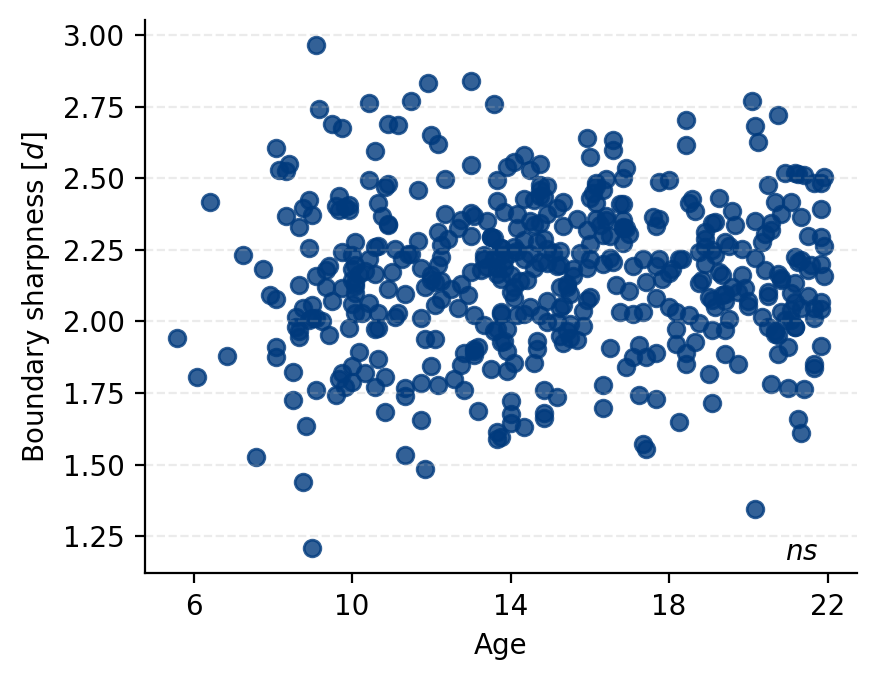

body


,n,r,CI95%,p-val,BF10,power
pearson,471,0.245807,"[0.16, 0.33]",6.531906e-08,1.207e+05,0.999744


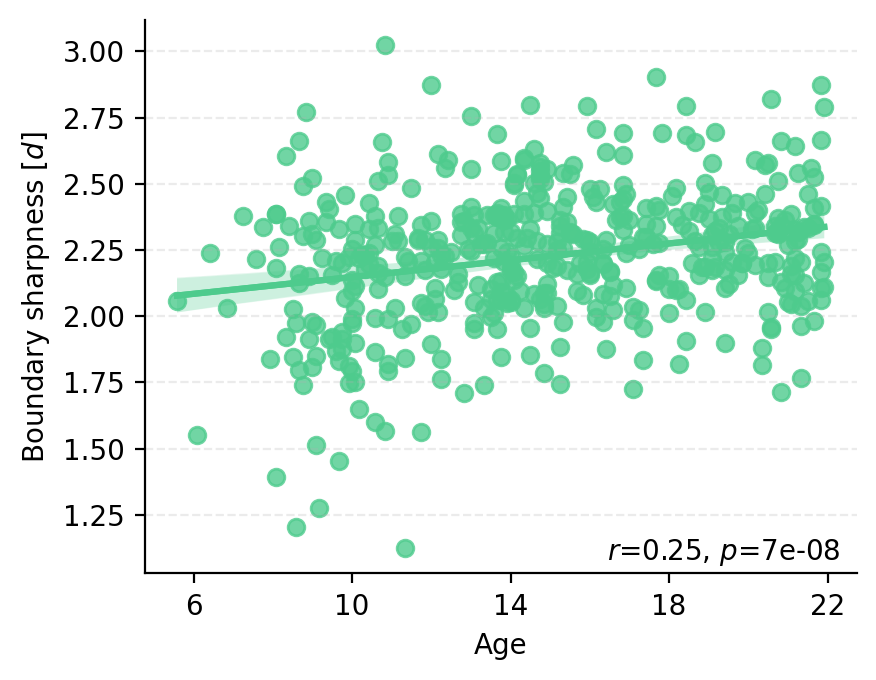

post


,n,r,CI95%,p-val,BF10,power
pearson,471,0.274546,"[0.19, 0.36]",1.366875e-09,5.113e+06,0.999983


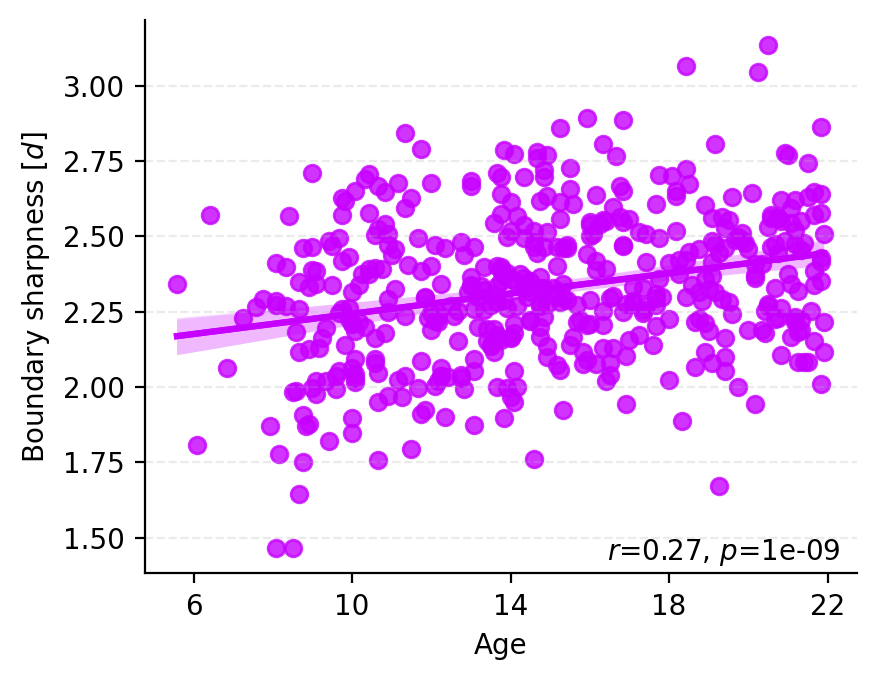

In [29]:
# Plot changes in boundary-sharpness segregation with age.

for idx, pos in enumerate(['ant','body','post']):

    print(pos)
    stats = pg.corr(df['age'], df[f'{pos}_sharpness'])
    r = stats['r'].values[0]
    p = stats['p-val'].values[0]
    display(stats)

    fig, ax = plt.subplots(figsize=(4.5,3.5))

    # Add regression line to significant effects.
    if p < .05:
        sns.regplot(x=df['age'], y=df[f'{pos}_sharpness'], color=cluster_colors[idx+1])
        sns.regplot(x=df['age'], y=df[f'{pos}_sharpness'], color=cluster_colors[idx+1], scatter_kws={'s':0})
        ax.text(.65,.025,f'$r$={r:.2f}, $p$={p:1.0e}', transform=ax.transAxes)
    else:
        sns.regplot(x=df['age'], y=df[f'{pos}_sharpness'], color=cluster_colors[idx+1],fit_reg=False)
        ax.text(.9,.025,f'$ns$', transform=ax.transAxes)

    sns.despine()
    ax.grid(linestyle='--', alpha=.25, axis='y')
    ax.set_ylabel('Boundary sharpness [$d$]')
    ax.set_xlabel('Age')
    ax.set_xticks([6,10,14,18,22])
    plt.tight_layout()
    plt.savefig(f'extra/{pos}_sharpness.svg')
    plt.show()



,n,r,CI95%,p-val,BF10,power
pearson,471,-0.147367,"[-0.23, -0.06]",0.00134,9.726,0.895178


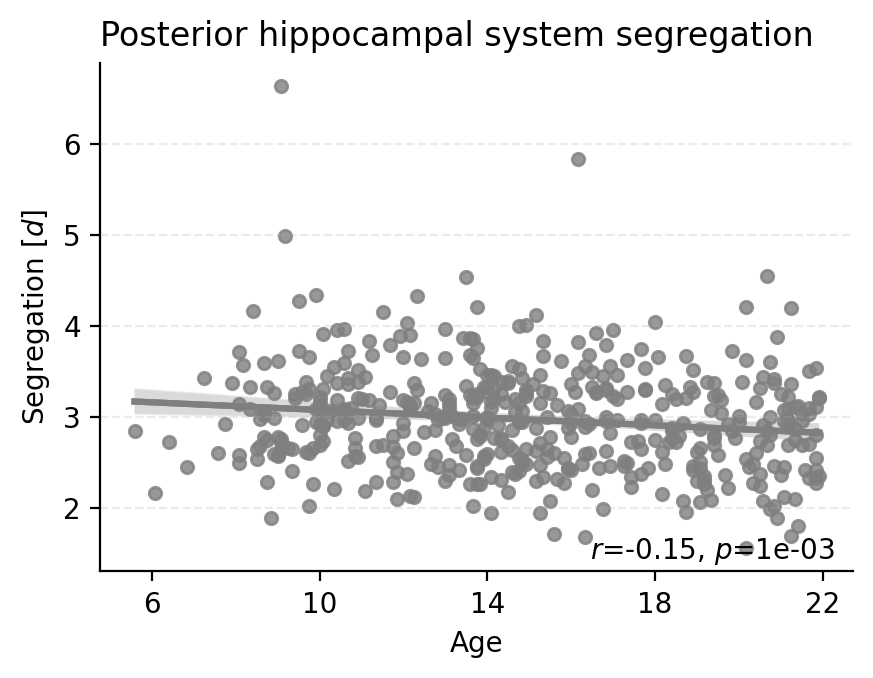

,n,r,CI95%,p-val,BF10,power
pearson,471,0.131002,"[0.04, 0.22]",0.004402,3.287,0.81411


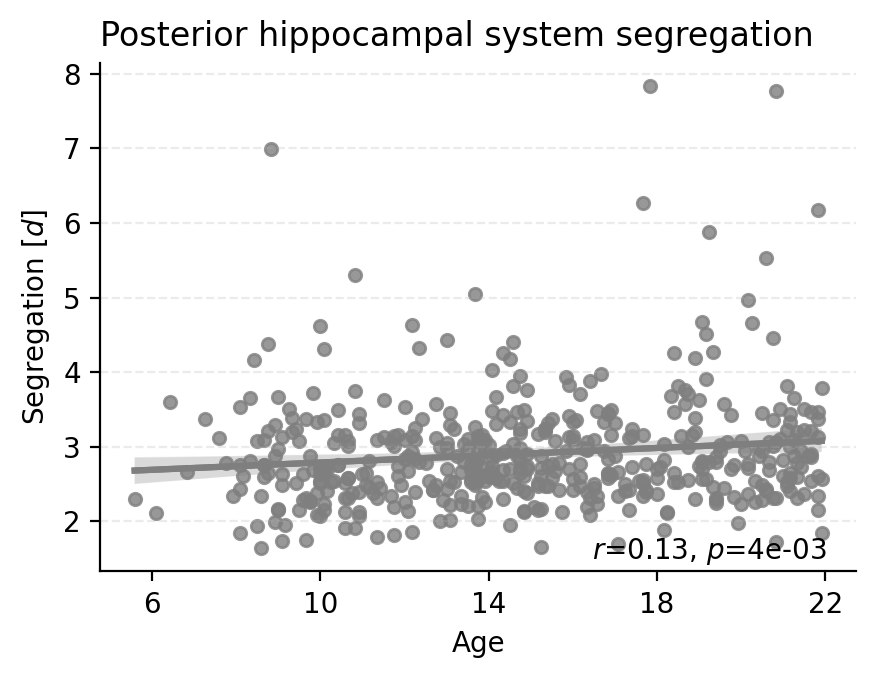

,n,r,CI95%,p-val,BF10,power
pearson,471,0.478903,"[0.41, 0.55]",2.244299e-28,1.517e+25,1.0


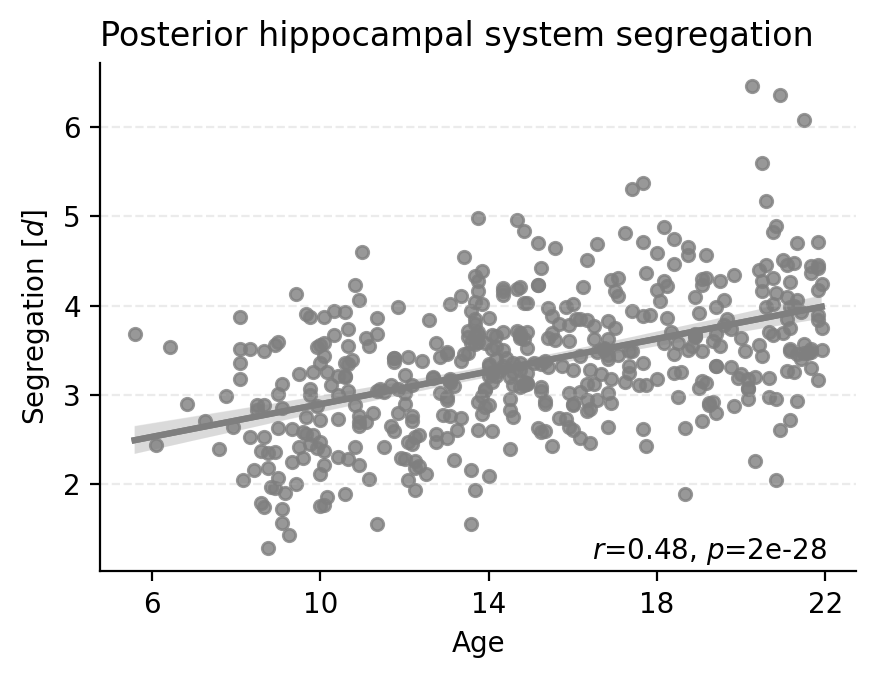

In [ ]:
# Plot changes in segregation with age.

for idx, pos in enumerate(['ant','body','post']):

    stats = pg.corr(df['age'], df[f'{pos}_segregation'])
    r = stats['r'].values[0]
    p = stats['p-val'].values[0]
    display(stats)

    fig, ax = plt.subplots(figsize=(4.5,3.5))
    if p < .05:
        sns.regplot(x=df['age'], y=df[f'{pos}_segregation'], color=cluster_colors[idx+1])
        sns.regplot(x=df['age'], y=df[f'{pos}_segregation'], color=cluster_colors[idx+1], scatter_kws={'s':0})
        ax.text(.65,.025,f'$r$={r:.2f}, $p$={p:1.0e}', transform=ax.transAxes)
    else:
        sns.regplot(x=df['age'], y=df[f'{pos}_segregation'], color=cluster_colors[idx+1],fit_reg=False)
        ax.text(.9,.025,f'$ns$', transform=ax.transAxes)

    sns.despine()
    ax.grid(linestyle='--', alpha=.25, axis='y')
    ax.set_ylabel('Segregation [$d$]')
    ax.set_xlabel('Age')
    ax.set_xticks([6,10,14,18,22])
    plt.tight_layout()
    plt.savefig(f'extra/{pos}_segregation.svg')
    plt.show()



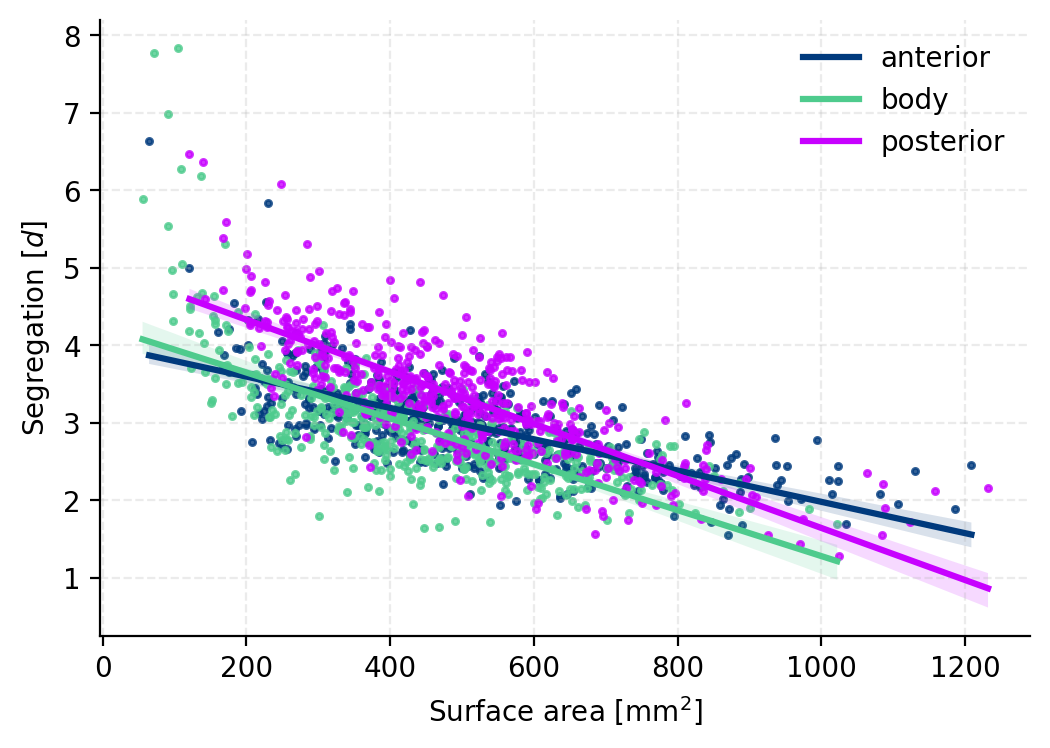

Linear regression predicting age:


,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,10.397996,2.021339,5.144113,3.963677e-07,0.270322,0.265635,6.425950,14.370042
1,post_mm,-0.006890,0.001448,-4.757475,2.617063e-06,0.270322,0.265635,-0.009736,-0.004044
2,post_sharpness,1.992140,0.727968,2.736576,6.444910e-03,0.270322,0.265635,0.561642,3.422639
3,post_segregation,0.980471,0.363030,2.700802,7.168657e-03,0.270322,0.265635,0.267097,1.693845


In [5]:
# Plot correlation between segregation and surface area.

fig ,ax = plt.subplots(figsize=(6,4))

sns.regplot(x=df['ant_mm'], y=df['ant_segregation'], scatter_kws={'s':5}, color=cluster_colors[1])
sns.regplot(x=df['body_mm'], y=df['body_segregation'], scatter_kws={'s':5}, color=cluster_colors[2])
sns.regplot(x=df['post_mm'], y=df['post_segregation'], scatter_kws={'s':5}, color=cluster_colors[3])
sns.despine()

ax.grid(linestyle='--', alpha=.25)
ax.set_xlabel('Surface area [mm$^2$]')
ax.set_ylabel('Segregation [$d$]')
ax.legend(['_','anterior','_','_','body','_','_','posterior'], frameon=False)
plt.show()

lm = pg.linear_regression(X=df[['post_mm','post_sharpness','post_segregation']], y=df['age'])
print('Linear regression predicting age:')
display(lm)


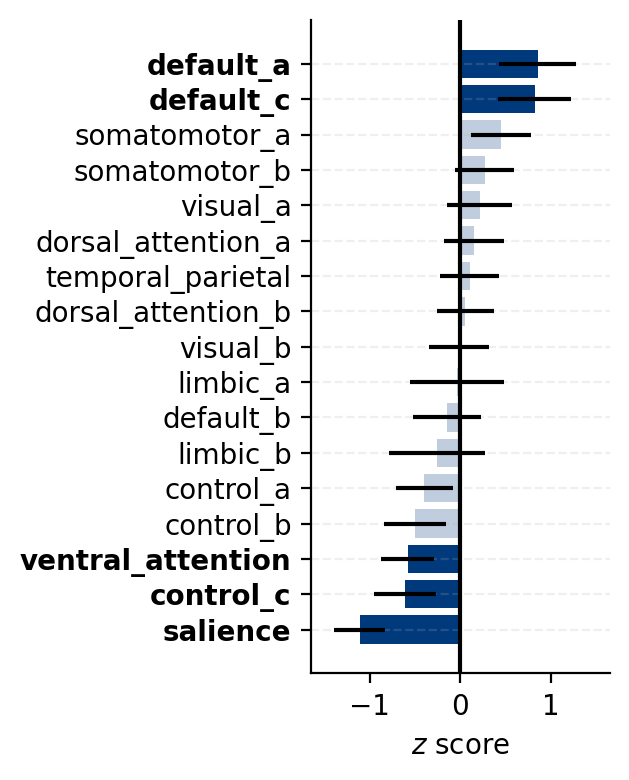

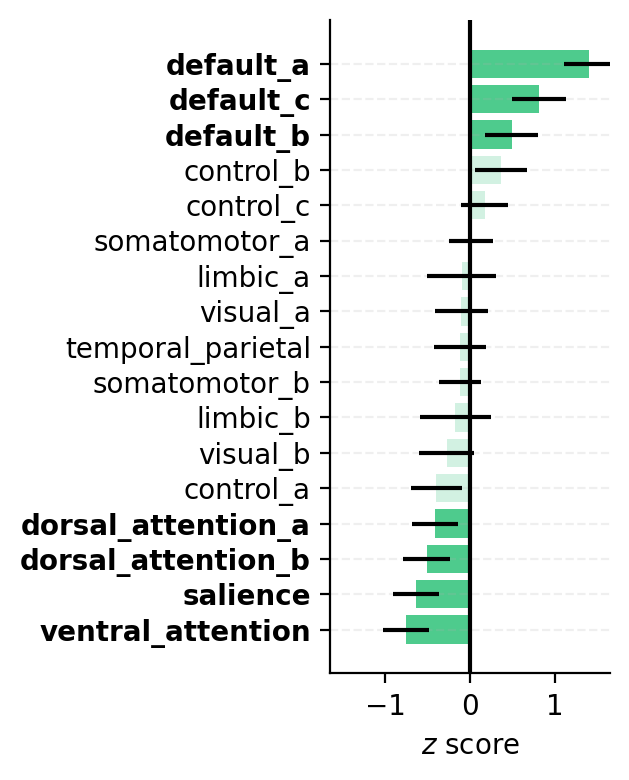

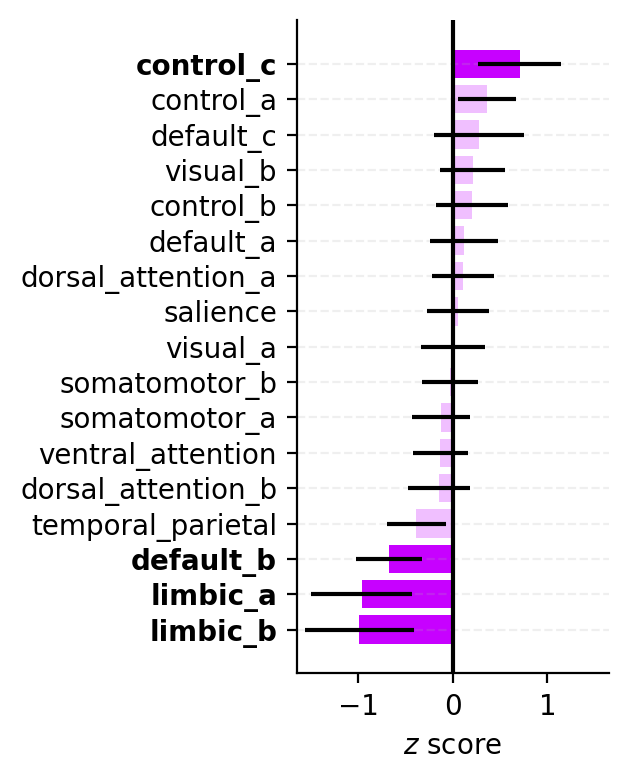

In [6]:

networks = {
    1:'visual_a',
    2:'visual_b',
    3:'somatomotor_a',
    4:'somatomotor_b',
    5:'dorsal_attention_a',
    6:'dorsal_attention_b',
    7:'ventral_attention',
    8:'salience',
    9:'limbic_a',
    10:'limbic_b',
    11:'control_c',
    12:'control_a',
    13:'control_b',
    14:'temporal_parietal',
    15:'default_c',
    16:'default_a',
    17:'default_b'
}
network_labels = np.array(list(networks.values()))


def cohens_d(x):
    d = (np.mean(x) - 0) / np.std(x, ddof=1)
    return np.abs(d)



for idx, pos in enumerate(['ant','body','post']):

    fig, ax = plt.subplots(figsize=(3.25, 4))

    network_fc = np.array([df[f'{pos}_{network}_FC'].mean() for network in network_labels])
    network_fc_err = np.array([df[f'{pos}_{network}_FC'].std() for network in network_labels])
    eff_size = np.array([cohens_d(df[f'{pos}_{network}_FC']) for network in network_labels])[np.argsort(network_fc)]

    bars = ax.barh(
        width=network_fc[np.argsort(network_fc)],
        y=network_labels[np.argsort(network_fc)],
        color=cluster_colors[idx+1], xerr=network_fc_err[np.argsort(network_fc)]
    )
    yticks = ax.get_yticklabels()


    for idx, bar in enumerate(bars):
        if eff_size[idx] < 1.5: bar.set_alpha(.25)
        if eff_size[idx] >= 1.5: yticks[idx].set_fontweight('bold')

    ax.set_xlim([-1.65,1.65])
    ax.set_xlabel('$z$ score')
    ax.axvline(0, color='k')
    sns.despine()
    ax.grid(axis='y', linestyle='--', alpha=.2)
    plt.tight_layout()
    plt.savefig(f'extra/{pos}_network_barplot.svg')



anterior


{'control_c': 0.015481609113934144,
 'salience': 0.07091757841723233,
 'control_b': 0.1162384843306755,
 'default_b': 0.197940876253703,
 'visual_b': 0.7595458750286689,
 'control_a': 0.8503381059796226,
 'ventral_attention': 1.203992132886706,
 'default_a': 1.5016864585275111,
 'default_c': 1.5648822866754721,
 'limbic_b': 1.9894526604680243,
 'temporal_parietal': 2.2606099252593057,
 'dorsal_attention_b': 3.2908108623224015,
 'visual_a': 3.8380162008495327,
 'somatomotor_a': 4.124235703991393,
 'somatomotor_b': 5.408021646961488,
 'limbic_a': 6.2658923384316045,
 'dorsal_attention_a': 6.888385433065743}

body


{'dorsal_attention_a': 0.0765358842835833,
 'control_a': 0.08690606341735088,
 'somatomotor_a': 0.19125640715328385,
 'ventral_attention': 0.21804372466591654,
 'somatomotor_b': 0.28987365351328426,
 'visual_a': 0.3226147316329552,
 'limbic_a': 0.3794489705684872,
 'dorsal_attention_b': 0.39307340839385846,
 'visual_b': 0.43454866734408043,
 'default_c': 1.166380313876912,
 'salience': 1.2701245842375712,
 'temporal_parietal': 1.4827654852901497,
 'limbic_b': 1.695258468198117,
 'control_c': 2.0920461125137346,
 'default_a': 4.084866676696617,
 'control_b': 8.274989003582427,
 'default_b': 26.101080016095228}

posterior


{'default_a': 0.1138221610290718,
 'default_b': 0.16014886127299194,
 'limbic_a': 0.2907611921913927,
 'temporal_parietal': 0.3644683902618113,
 'limbic_b': 0.4060944942972798,
 'somatomotor_a': 0.44724323381719344,
 'visual_a': 0.48941639666888936,
 'default_c': 0.5541049121944466,
 'somatomotor_b': 0.8212374273377394,
 'dorsal_attention_b': 0.9927610362852126,
 'dorsal_attention_a': 1.3525672590040703,
 'control_b': 1.8127597949857026,
 'visual_b': 2.7931804846052026,
 'ventral_attention': 4.356633626137892,
 'control_a': 8.352407660565264,
 'salience': 10.712377526133004,
 'control_c': 14.423822594754238}

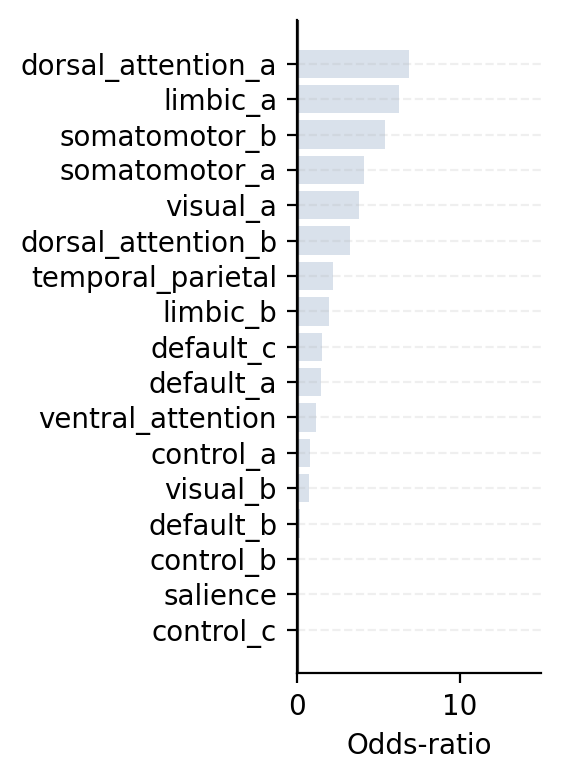

In [ ]:
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier


# Convert dataframe to long-form for one-versus-rest classification.
df_long = df.melt(id_vars='id', var_name='feature', value_name='value')
df_long[['class', 'sub_feature']] = df_long['feature'].str.extract(r'^(ant|body|post)_(.+)$')


df_long = df_long.drop_duplicates(subset=['id', 'class', 'sub_feature'])
df_wide = df_long.pivot(index=['id', 'class'], columns='sub_feature', values='value').reset_index()

df_wide = df_wide[df_wide['class'].isin(['ant','body','post'])]
features = [f'{label}_FC' for label in network_labels]

X = df_wide[features].to_numpy()
y = df_wide['class']

# Fit base classifier for coefficients.
clf = OneVsRestClassifier(LogisticRegression(penalty='l2', solver='liblinear'))
clf.fit(X, y)
coefs = np.vstack([est.coef_ for est in clf.estimators_])

titles = ['anterior','body','posterior']

for idx, pos in enumerate(['ant','body','post']):

    coef = clf.estimators_[idx].coef_[0]
    odds_ratios = np.exp(coef)
    odds_ratios_sorted = odds_ratios[np.argsort(odds_ratios)]
    network_labels_sorted = network_labels[np.argsort(odds_ratios)]

    fig, ax = plt.subplots(figsize=(3, 4))

    bars = ax.barh(
        width=odds_ratios_sorted,
        y=network_labels_sorted,
        color=cluster_colors[idx+1]
    )
    yticks = ax.get_yticklabels()

    for bar_idx, bar in enumerate(bars):
        if odds_ratios_sorted[bar_idx] < 10: bar.set_alpha(.15)
        if odds_ratios_sorted[bar_idx] > 10: yticks[bar_idx].set_fontweight('bold')

    ax.set_xlim([0,15])
    ax.set_xlabel('Odds-ratio')
    ax.axvline(0, color='k', alpha=.75)
    sns.despine()
    ax.grid(axis='y', linestyle='--', alpha=.2)
    plt.tight_layout()
    plt.savefig(f'extra/{pos}_network_barplot.svg')
    print(titles[idx])
    display(dict(zip(network_labels_sorted,odds_ratios_sorted)))



,n,r,CI95%,p-val,BF10,power
pearson,346,0.126454,"[0.02, 0.23]",0.018617,1.06,0.654544


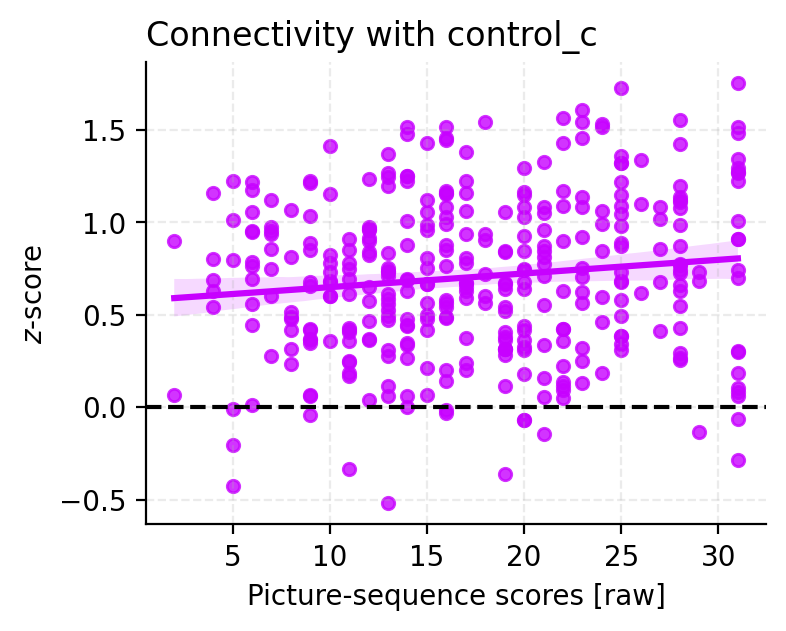

,n,r,CI95%,p-val,BF10,power
pearson,346,0.12748,"[0.02, 0.23]",0.017675,1.109,0.661644


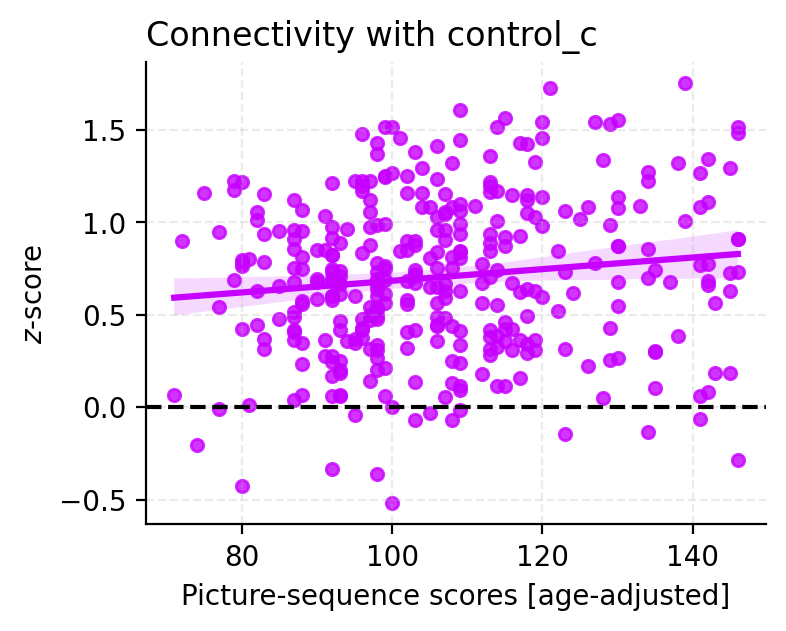

,n,r,CI95%,p-val,BF10,power
pearson,471,0.026769,"[-0.06, 0.12]",0.562239,0.068,0.089273


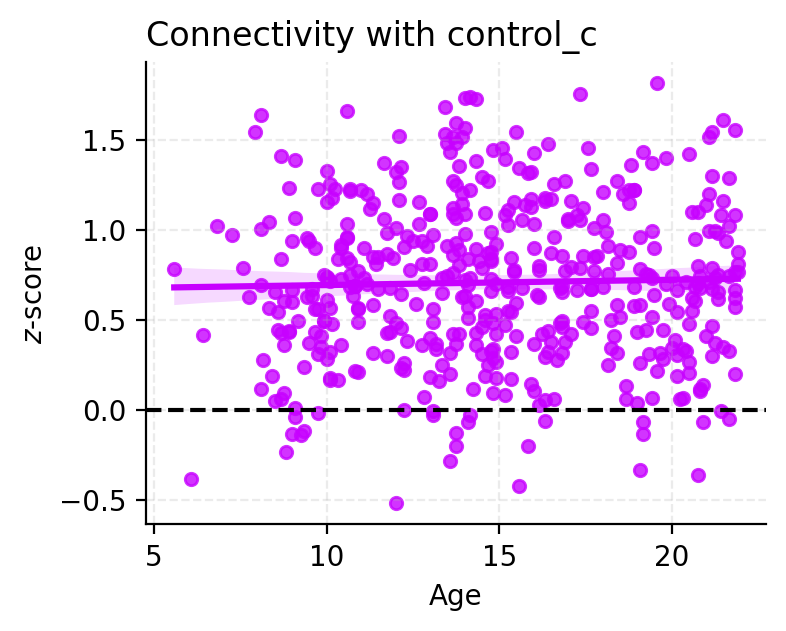

In [8]:
# Plot changes in connectivity of posterior_hipp – control_c network with age and memory.

labels = ['Picture-sequence scores [raw]','Picture-sequence scores [age-adjusted]','Age']

for idx, feature in enumerate(['nih_picseq_raw','nih_picseq_ageadjusted','age']):

    display(pg.corr(df[feature], df['post_control_c']))

    fig, ax = plt.subplots(figsize=(4,3))
    sns.regplot(x=df[feature], y=df['post_control_c'], color=cluster_colors[3], scatter_kws={'s':20})
    sns.despine()
    ax.axhline(0, linestyle='--', color='k')
    ax.set_ylabel('$z$-score')
    ax.set_xlabel(labels[idx])
    ax.set_title(f'Connectivity with control_c', loc='left')
    ax.grid(linestyle='--', alpha=.25)
    plt.show()


,n,r,CI95%,p-val,BF10,power
pearson,346,0.197798,"[0.09, 0.3]",0.000213,61.988,0.960553


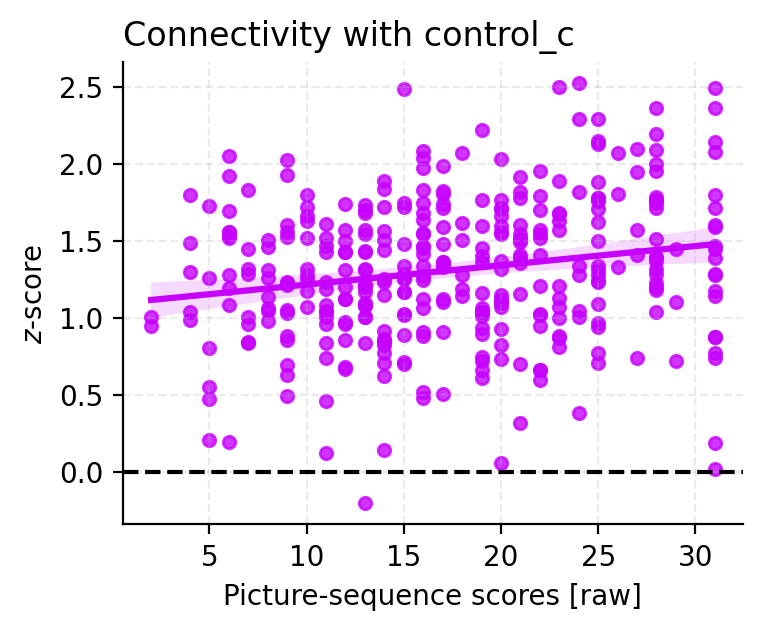

,n,r,CI95%,p-val,BF10,power
pearson,346,0.187684,"[0.08, 0.29]",0.000449,31.016,0.940896


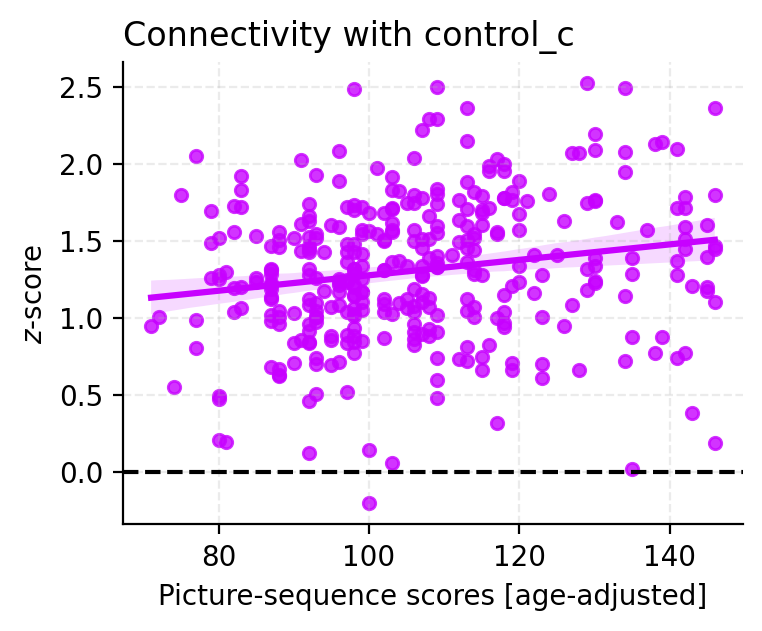

,n,r,CI95%,p-val,BF10,power
pearson,471,0.089324,"[-0.0, 0.18]",0.05271,0.375,0.49181


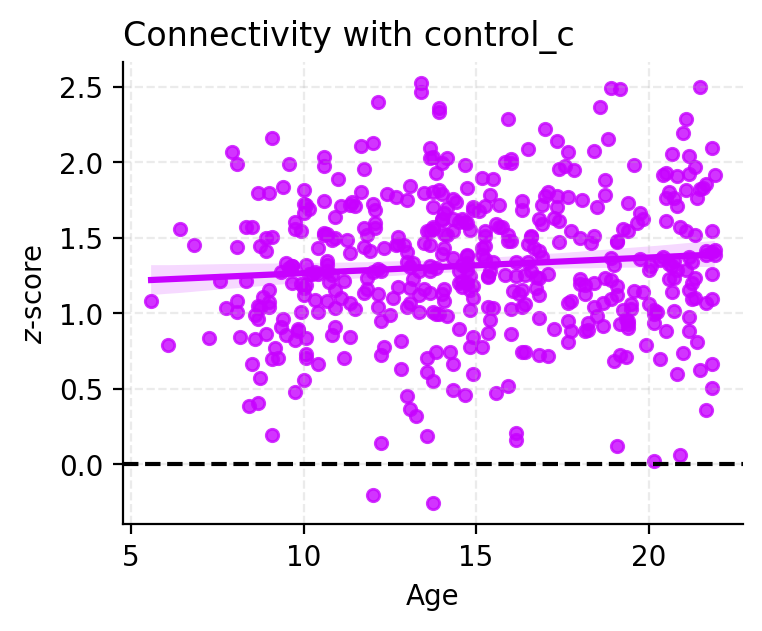

In [9]:
# Plot changes in connectivity of posterior_hipp – control_c, versus-anterior/body, network with age and memory.

labels = ['Picture-sequence scores [raw]','Picture-sequence scores [age-adjusted]','Age']

for idx, feature in enumerate(['nih_picseq_raw','nih_picseq_ageadjusted','age']):

    display(pg.corr(df[feature], df['post_control_c_OVR']))

    fig, ax = plt.subplots(figsize=(4,3))
    sns.regplot(x=df[feature], y=df['post_control_c_OVR'], color=cluster_colors[3], scatter_kws={'s':20})
    sns.despine()
    ax.axhline(0, linestyle='--', color='k')
    ax.set_ylabel('$z$-score')
    ax.set_xlabel(labels[idx])
    ax.set_title(f'Connectivity with control_c', loc='left')
    ax.grid(linestyle='--', alpha=.25)
    plt.show()


POS2


,n,r,CI95%,p-val,BF10,power
pearson,346,0.170041,"[0.07, 0.27]",0.0015,10.169,0.889579


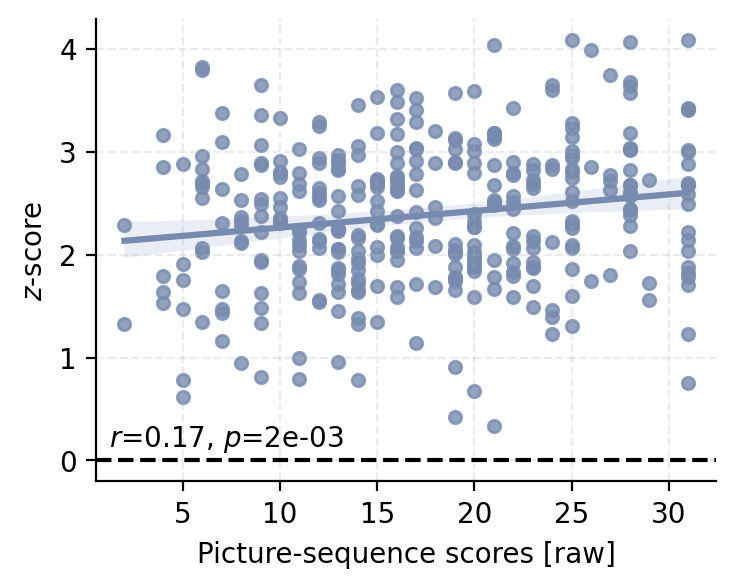

,n,r,CI95%,p-val,BF10,power
pearson,346,0.166187,"[0.06, 0.27]",0.001924,8.096,0.875079


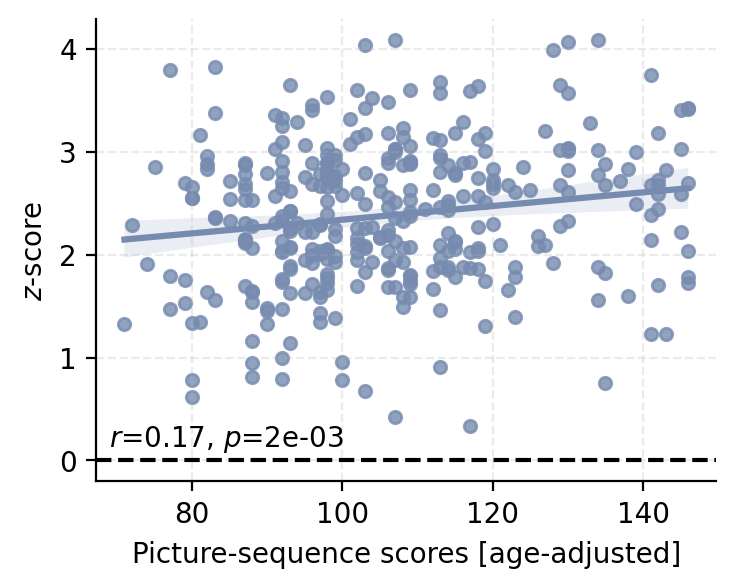

,n,r,CI95%,p-val,BF10,power
pearson,471,0.153497,"[0.06, 0.24]",0.000831,15.111,0.917792


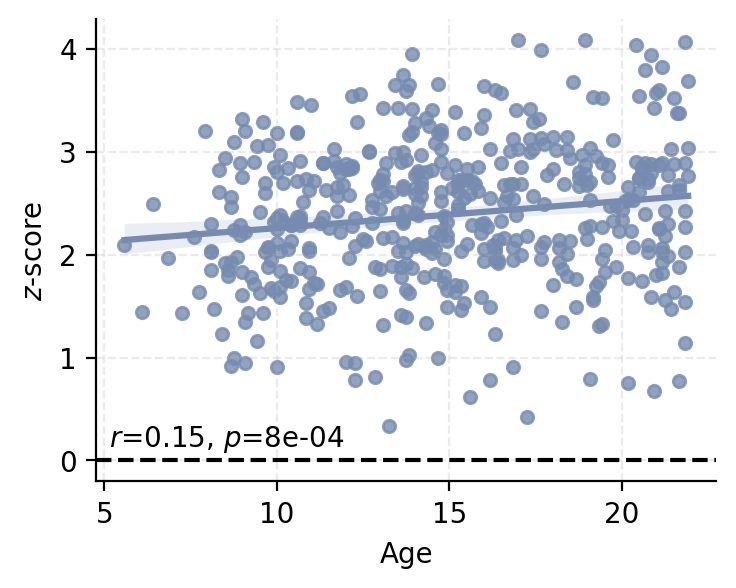

Mediation analysis:


,path,coef,se,pval,CI[2.5%],CI[97.5%],sig
0,post_POS2_OVR ~ X,0.022750,0.009234,0.014240,0.004588,0.040912,Yes
1,Y ~ post_POS2_OVR,4.157819,1.330176,0.001924,1.541518,6.774120,Yes
2,Total,0.266084,0.232612,0.253462,-0.191437,0.723606,No
3,Direct,0.174521,0.231978,0.452377,-0.281758,0.630801,No
4,Indirect,0.091563,0.050380,0.008000,0.021149,0.226650,Yes


RSC


,n,r,CI95%,p-val,BF10,power
pearson,346,0.147658,"[0.04, 0.25]",0.005928,2.92,0.787682


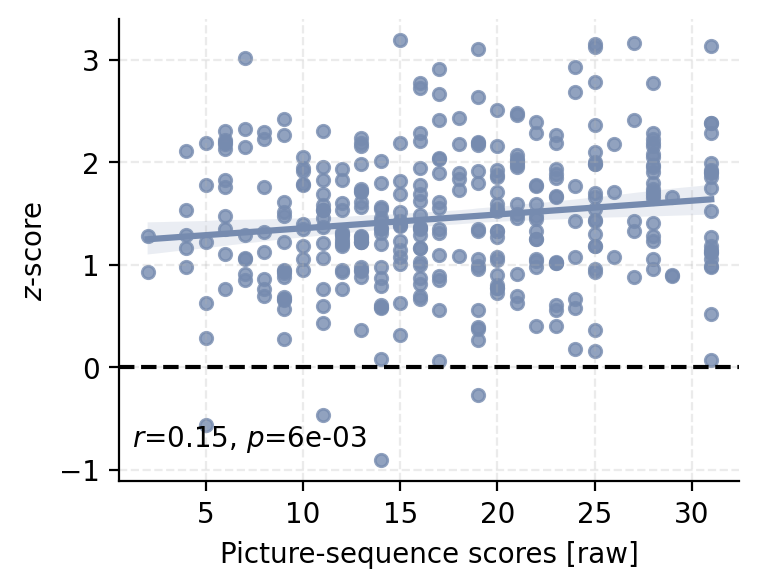

,n,r,CI95%,p-val,BF10,power
pearson,346,0.157584,"[0.05, 0.26]",0.003293,4.964,0.838152


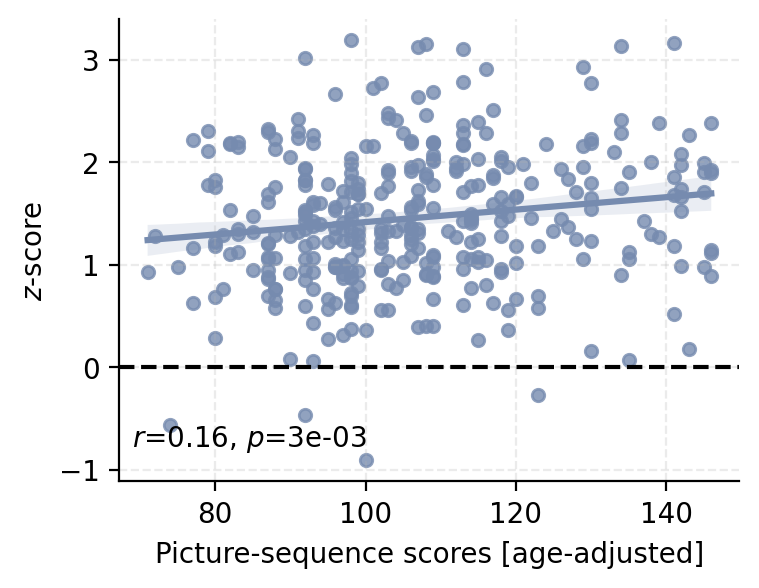

,n,r,CI95%,p-val,BF10,power
pearson,471,0.082272,"[-0.01, 0.17]",0.074457,0.282,0.430822


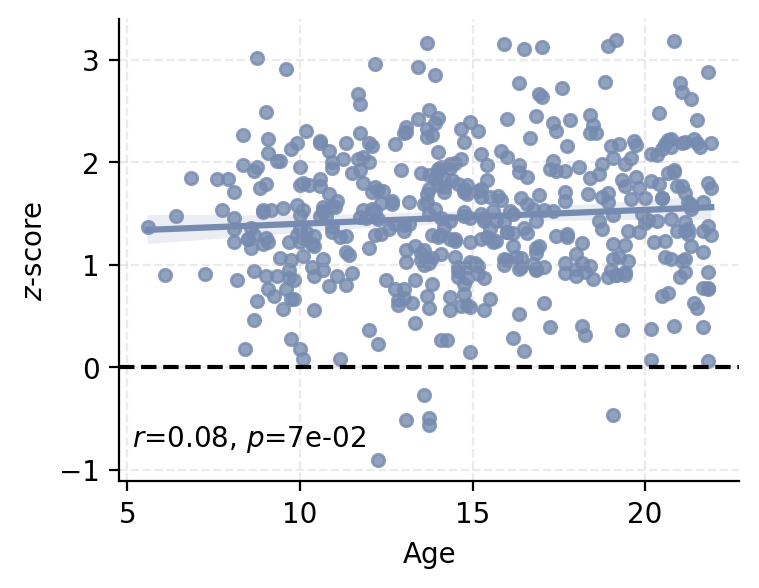

Mediation analysis:


,path,coef,se,pval,CI[2.5%],CI[97.5%],sig
0,post_RSC_OVR ~ X,0.009615,0.008946,0.283233,-0.007981,0.027210,No
1,Y ~ post_RSC_OVR,4.098481,1.384750,0.003293,1.374839,6.822124,Yes
2,Total,0.266084,0.232612,0.253462,-0.191437,0.723606,No
3,Direct,0.227440,0.230537,0.324551,-0.226005,0.680885,No
4,Indirect,0.038644,0.039333,0.276000,-0.019270,0.141921,No


7Pm


,n,r,CI95%,p-val,BF10,power
pearson,346,-0.105232,"[-0.21, 0.0]",0.05049,0.452,0.499501


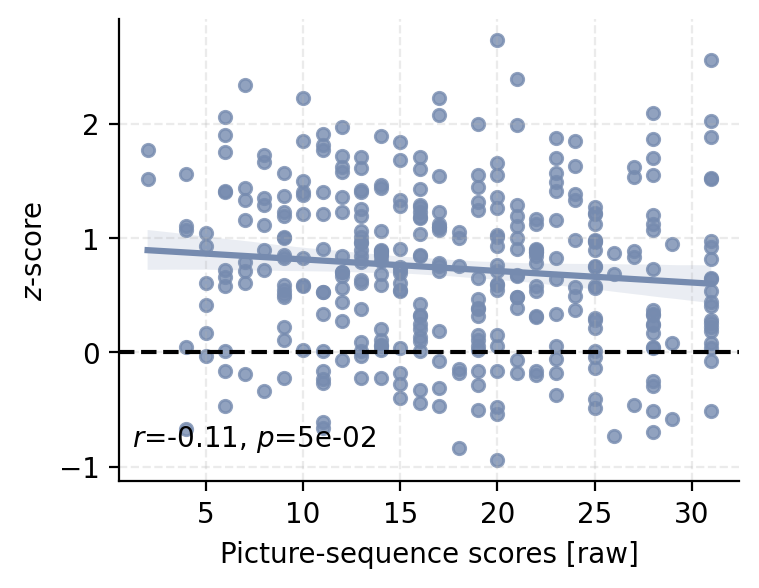

,n,r,CI95%,p-val,BF10,power
pearson,346,-0.076705,"[-0.18, 0.03]",0.154527,0.185,0.296708


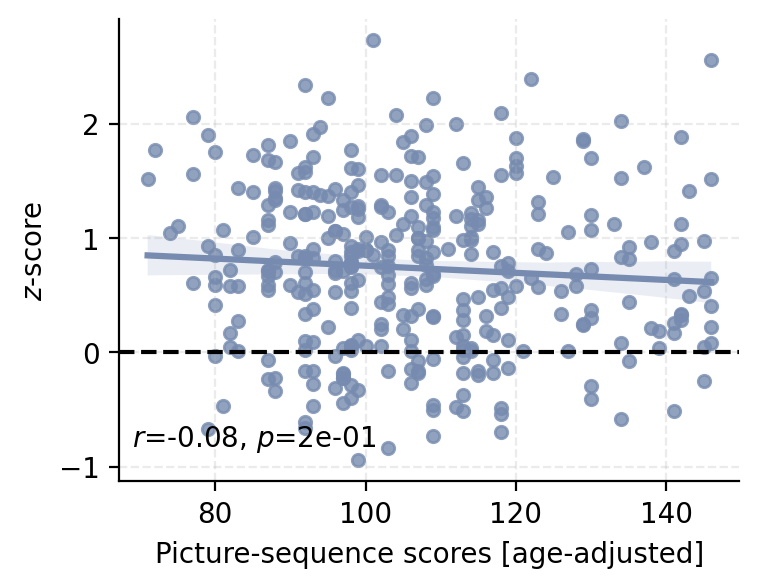

,n,r,CI95%,p-val,BF10,power
pearson,471,-0.114445,"[-0.2, -0.02]",0.012944,1.254,0.701635


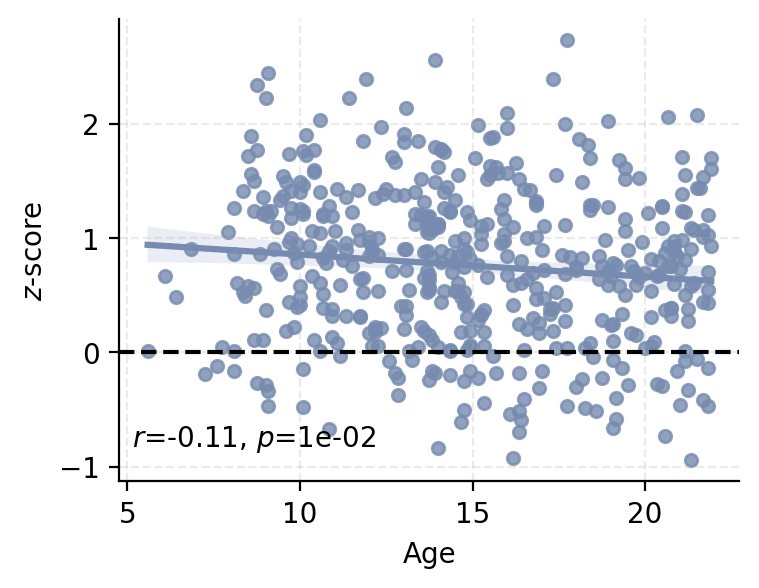

Mediation analysis:


,path,coef,se,pval,CI[2.5%],CI[97.5%],sig
0,post_7Pm_OVR ~ X,-0.015834,0.009427,0.093926,-0.034376,0.002707,No
1,Y ~ post_7Pm_OVR,-1.888566,1.323581,0.154527,-4.491897,0.714764,No
2,Total,0.266084,0.232612,0.253462,-0.191437,0.723606,No
3,Direct,0.238117,0.233304,0.308150,-0.220770,0.697005,No
4,Indirect,0.027967,0.030322,0.232000,-0.006591,0.115579,No


In [10]:
labels = ['Picture-sequence scores [raw]','Picture-sequence scores [age-adjusted]','Age']
col = (0.4627450980392157, 0.5450980392156862, 0.6862745098039216)

for roi in ['POS2','RSC','7Pm']:

    print(roi)

    for idx, feature in enumerate(['nih_picseq_raw','nih_picseq_ageadjusted','age']):

        fig, ax = plt.subplots(figsize=(4,3))
        stats = pg.corr(df[feature], df[f'post_{roi}_OVR'])
        display(stats)
        sns.regplot(x=df[feature], y=df[f'post_{roi}_OVR'], color=col, scatter_kws={'s':20})
        sns.despine()
        ax.axhline(0, linestyle='--', color='k')
        ax.set_ylabel('$z$-score')
        ax.set_xlabel(labels[idx])
        ax.grid(linestyle='--', alpha=.25)
        ax.text(.02,.075,f"$r$={stats['r'].values[0]:.2f}, $p$={stats['p-val'].values[0]:.0e}", transform=ax.transAxes)
        plt.show()

    print('Mediation analysis:')
    display(pg.mediation_analysis(data=df, x='age', m=f'post_{roi}_OVR', y='nih_picseq_ageadjusted'))


In [11]:
# Replication across sites.

for feature in ['post_mm','post_segregation','post_sharpness']:

    print(f'Feature: {feature}')

    for site in set(df.site):
        print(f'{site}:')
        display(pg.corr(
            df[df.site == site]['age'],
            df[df.site == site][feature])
        )
    print('\n')

for feature in ['post_control_c_OVR']:

    print(f'Feature: {feature}')

    for site in set(df.site):
        print(f'{site}:')
        print('Age:')
        display(pg.corr(
            df[df.site == site]['age'],
            df[df.site == site][feature])
        )
        print('Age-adjusted memory:')
        display(pg.corr(
            df[df.site == site]['nih_picseq_raw'],
            df[df.site == site][feature])
        )
        print('Raw-memory:')
        display(pg.corr(
            df[df.site == site]['nih_picseq_ageadjusted'],
            df[df.site == site][feature])
        )

    print('\n')



display(pg.anova(data=df, dv='age', between='site'))
for site in set(df.site):
    print(site)
    print(f'{df[df.site == site].age.mean():2.1f} ± {df[df.site == site].age.std():2.1f}')

display(pg.chi2_independence(data=df, x='site', y='sex'))


Feature: post_mm
UCLA:


,n,r,CI95%,p-val,BF10,power
pearson,95,-0.53934,"[-0.67, -0.38]",1.707713e-08,8.062e+05,0.999941


WashU:


,n,r,CI95%,p-val,BF10,power
pearson,108,-0.480033,"[-0.61, -0.32]",1.464018e-07,9.991e+04,0.999688


Harvard:


,n,r,CI95%,p-val,BF10,power
pearson,152,-0.449058,"[-0.57, -0.31]",6.524689e-09,1.765e+06,0.999962


UMinn:


,n,r,CI95%,p-val,BF10,power
pearson,116,-0.452717,"[-0.59, -0.29]",3.354395e-07,4.429e+04,0.99942




Feature: post_segregation
UCLA:


,n,r,CI95%,p-val,BF10,power
pearson,95,0.473239,"[0.3, 0.62]",0.000001,1.327e+04,0.998628


WashU:


,n,r,CI95%,p-val,BF10,power
pearson,108,0.451481,"[0.29, 0.59]",9.381660e-07,1.705e+04,0.998841


Harvard:


,n,r,CI95%,p-val,BF10,power
pearson,152,0.454002,"[0.32, 0.57]",4.240591e-09,2.674e+06,0.999973


UMinn:


,n,r,CI95%,p-val,BF10,power
pearson,116,0.540784,"[0.4, 0.66]",3.690862e-10,3.043e+07,0.999997




Feature: post_sharpness
UCLA:


,n,r,CI95%,p-val,BF10,power
pearson,95,0.317685,"[0.12, 0.49]",0.001706,16.306,0.887079


WashU:


,n,r,CI95%,p-val,BF10,power
pearson,108,0.336371,"[0.16, 0.49]",0.000372,62.236,0.949629


Harvard:


,n,r,CI95%,p-val,BF10,power
pearson,152,0.268298,"[0.11, 0.41]",0.000832,25.599,0.920307


UMinn:


,n,r,CI95%,p-val,BF10,power
pearson,116,0.180373,"[-0.0, 0.35]",0.052677,0.741,0.49438




Feature: post_control_c_OVR
UCLA:
Age:


,n,r,CI95%,p-val,BF10,power
pearson,95,0.026364,"[-0.18, 0.23]",0.799802,0.132,0.057256


Age-adjusted memory:


,n,r,CI95%,p-val,BF10,power
pearson,83,0.353308,"[0.15, 0.53]",0.001052,26.753,0.913094


Raw-memory:


,n,r,CI95%,p-val,BF10,power
pearson,83,0.379021,"[0.18, 0.55]",0.00041,63.234,0.94814


WashU:
Age:


,n,r,CI95%,p-val,BF10,power
pearson,108,0.185114,"[-0.0, 0.36]",0.055112,0.739,0.486736


Age-adjusted memory:


,n,r,CI95%,p-val,BF10,power
pearson,93,0.231357,"[0.03, 0.42]",0.02566,1.503,0.612502


Raw-memory:


,n,r,CI95%,p-val,BF10,power
pearson,93,0.134737,"[-0.07, 0.33]",0.197865,0.293,0.252495


Harvard:
Age:


,n,r,CI95%,p-val,BF10,power
pearson,152,-0.032125,"[-0.19, 0.13]",0.694395,0.11,0.067799


Age-adjusted memory:


,n,r,CI95%,p-val,BF10,power
pearson,138,0.142907,"[-0.02, 0.3]",0.094504,0.425,0.388719


Raw-memory:


,n,r,CI95%,p-val,BF10,power
pearson,138,0.169566,"[0.0, 0.33]",0.046783,0.753,0.514251


UMinn:
Age:


,n,r,CI95%,p-val,BF10,power
pearson,116,0.235546,"[0.06, 0.4]",0.010917,2.845,0.726266


Age-adjusted memory:


,n,r,CI95%,p-val,BF10,power
pearson,32,0.034192,"[-0.32, 0.38]",0.852619,0.223,0.053516


Raw-memory:


,n,r,CI95%,p-val,BF10,power
pearson,32,-0.060188,"[-0.4, 0.29]",0.743497,0.231,0.06199


,Source,ddof1,ddof2,F,p-unc,np2
0,site,3,467,2.486052,0.059993,0.015719


UCLA
14.6 ± 4.0
WashU
15.4 ± 4.2
Harvard
15.3 ± 3.9
UMinn
14.2 ± 4.0


(sex              F          M
 site                         
 Harvard  77.774947  74.225053
 UCLA     48.609342  46.390658
 UMinn    59.354565  56.645435
 WashU    55.261146  52.738854,
 sex       F   M
 site           
 Harvard  77  75
 UCLA     47  48
 UMinn    64  52
 WashU    53  55,
                  test    lambda      chi2  dof      pval    cramer     power
 0             pearson  1.000000  1.058936  3.0  0.786995  0.047416  0.119922
 1        cressie-read  0.666667  1.059380  3.0  0.786888  0.047426  0.119954
 2      log-likelihood  0.000000  1.060562  3.0  0.786602  0.047452  0.120040
 3       freeman-tukey -0.500000  1.061707  3.0  0.786325  0.047478  0.120123
 4  mod-log-likelihood -1.000000  1.063076  3.0  0.785994  0.047509  0.120223
 5              neyman -2.000000  1.066488  3.0  0.785170  0.047585  0.120471)

In [12]:
# Replication across sites.

for feature in ['post_mm','post_segregation','post_sharpness']:

    print(f'Feature: {feature}')

    for site in set(df.site):
        print(f'{site}:')
        display(pg.corr(
            df[df.site != site]['age'],
            df[df.site != site][feature])
        )
    print('\n')

for feature in ['post_control_c_OVR']:

    print(f'Feature: {feature}')

    for site in set(df.site):
        print(f'{site}:')
        print('Age:')
        display(pg.corr(
            df[df.site != site]['age'],
            df[df.site != site][feature])
        )
        print('Age-adjusted memory:')
        display(pg.corr(
            df[df.site != site]['nih_picseq_raw'],
            df[df.site != site][feature])
        )
        print('Raw-memory:')
        display(pg.corr(
            df[df.site != site]['nih_picseq_ageadjusted'],
            df[df.site != site][feature])
        )

    print('\n')



display(pg.anova(data=df, dv='age', between='site'))
for site in set(df.site):
    print(site)
    print(f'{df[df.site != site].age.mean():2.1f} ± {df[df.site != site].age.std():2.1f}')

display(pg.chi2_independence(data=df, x='site', y='sex'))


Feature: post_mm
UCLA:


,n,r,CI95%,p-val,BF10,power
pearson,376,-0.467879,"[-0.54, -0.38]",7.517880e-22,5.874e+18,1.0


WashU:


,n,r,CI95%,p-val,BF10,power
pearson,363,-0.48186,"[-0.56, -0.4]",1.676824e-22,2.606e+19,1.0


Harvard:


,n,r,CI95%,p-val,BF10,power
pearson,319,-0.49001,"[-0.57, -0.4]",1.136721e-20,4.256e+17,1.0


UMinn:


,n,r,CI95%,p-val,BF10,power
pearson,355,-0.482171,"[-0.56, -0.4]",4.550715e-22,9.807e+18,1.0




Feature: post_segregation
UCLA:


,n,r,CI95%,p-val,BF10,power
pearson,376,0.486249,"[0.41, 0.56]",1.038926e-23,4.003e+20,1.0


WashU:


,n,r,CI95%,p-val,BF10,power
pearson,363,0.487706,"[0.41, 0.56]",4.351030e-23,9.852e+19,1.0


Harvard:


,n,r,CI95%,p-val,BF10,power
pearson,319,0.48831,"[0.4, 0.57]",1.613075e-20,3.016e+17,1.0


UMinn:


,n,r,CI95%,p-val,BF10,power
pearson,355,0.453095,"[0.37, 0.53]",2.255526e-19,2.176e+16,1.0




Feature: post_sharpness
UCLA:


,n,r,CI95%,p-val,BF10,power
pearson,376,0.266432,"[0.17, 0.36]",1.569681e-07,5.733e+04,0.999549


WashU:


,n,r,CI95%,p-val,BF10,power
pearson,363,0.251891,"[0.15, 0.35]",0.000001,8477.163,0.998309


Harvard:


,n,r,CI95%,p-val,BF10,power
pearson,319,0.280034,"[0.18, 0.38]",3.695602e-07,2.706e+04,0.999217


UMinn:


,n,r,CI95%,p-val,BF10,power
pearson,355,0.300466,"[0.2, 0.39]",7.684658e-09,1.083e+06,0.999944




Feature: post_control_c_OVR
UCLA:
Age:


,n,r,CI95%,p-val,BF10,power
pearson,376,0.103034,"[0.0, 0.2]",0.045872,0.47,0.515725


Age-adjusted memory:


,n,r,CI95%,p-val,BF10,power
pearson,263,0.153517,"[0.03, 0.27]",0.012682,1.695,0.705183


Raw-memory:


,n,r,CI95%,p-val,BF10,power
pearson,263,0.130316,"[0.01, 0.25]",0.034659,0.71,0.562332


WashU:
Age:


,n,r,CI95%,p-val,BF10,power
pearson,363,0.062603,"[-0.04, 0.16]",0.234122,0.133,0.221661


Age-adjusted memory:


,n,r,CI95%,p-val,BF10,power
pearson,253,0.18846,"[0.07, 0.3]",0.002614,7.107,0.855717


Raw-memory:


,n,r,CI95%,p-val,BF10,power
pearson,253,0.202565,"[0.08, 0.32]",0.001197,14.515,0.902099


Harvard:
Age:


,n,r,CI95%,p-val,BF10,power
pearson,319,0.157003,"[0.05, 0.26]",0.004945,3.574,0.804616


Age-adjusted memory:


,n,r,CI95%,p-val,BF10,power
pearson,208,0.241054,"[0.11, 0.37]",0.000452,38.985,0.941602


Raw-memory:


,n,r,CI95%,p-val,BF10,power
pearson,208,0.200844,"[0.07, 0.33]",0.003628,5.792,0.831876


UMinn:
Age:


,n,r,CI95%,p-val,BF10,power
pearson,355,0.045136,"[-0.06, 0.15]",0.396519,0.095,0.135606


Age-adjusted memory:


,n,r,CI95%,p-val,BF10,power
pearson,314,0.217583,"[0.11, 0.32]",0.000102,130.113,0.974123


Raw-memory:


,n,r,CI95%,p-val,BF10,power
pearson,314,0.215468,"[0.11, 0.32]",0.000119,112.105,0.971674


,Source,ddof1,ddof2,F,p-unc,np2
0,site,3,467,2.486052,0.059993,0.015719


UCLA
15.0 ± 4.0
WashU
14.8 ± 4.0
Harvard
14.7 ± 4.1
UMinn
15.2 ± 4.0


(sex              F          M
 site                         
 Harvard  77.774947  74.225053
 UCLA     48.609342  46.390658
 UMinn    59.354565  56.645435
 WashU    55.261146  52.738854,
 sex       F   M
 site           
 Harvard  77  75
 UCLA     47  48
 UMinn    64  52
 WashU    53  55,
                  test    lambda      chi2  dof      pval    cramer     power
 0             pearson  1.000000  1.058936  3.0  0.786995  0.047416  0.119922
 1        cressie-read  0.666667  1.059380  3.0  0.786888  0.047426  0.119954
 2      log-likelihood  0.000000  1.060562  3.0  0.786602  0.047452  0.120040
 3       freeman-tukey -0.500000  1.061707  3.0  0.786325  0.047478  0.120123
 4  mod-log-likelihood -1.000000  1.063076  3.0  0.785994  0.047509  0.120223
 5              neyman -2.000000  1.066488  3.0  0.785170  0.047585  0.120471)